# Google TheLook E-Commerce Dataset

## Overview

This synthetic retail dataset created by Google represents a fictitious online clothing retailer and is designed for **analytics, data science, and BI experimentation**.

The dataset captures the **end-to-end eCommerce lifecycle**, including:

* Users and demographics
* Products and inventory
* Orders and fulfillment
* Web events and sessions
* Logistics and distribution centers
* Digital traffic sources

---

## Availability & Access

* **Hosting platform:** Google BigQuery (Public Dataset)
* **Ideal for:** SQL analytics, BI dashboards, data engineering pipelines, ML feature engineering, and forecasting demos

---

## Dataset Structure

The dataset is organized into **seven relational tables**, closely mirroring a real-world eCommerce schema.

---

## 1. `distribution_centers.csv`

Information about logistics hubs that store and ship products.

| Column      | Description                                   |
| ----------- | --------------------------------------------- |
| `id`        | Unique identifier for the distribution center |
| `name`      | Distribution center name                      |
| `latitude`  | Latitude coordinate                           |
| `longitude` | Longitude coordinate                          |

**Use cases:**
Logistics optimization, shipping distance analysis, geospatial visualization.

---

## 2. `events.csv`

Web and user interaction events generated during browsing sessions.

| Column                         | Description                                   |
| ------------------------------ | --------------------------------------------- |
| `id`                           | Unique event identifier                       |
| `user_id`                      | Associated user                               |
| `sequence_number`              | Event order within session                    |
| `session_id`                   | Session identifier                            |
| `created_at`                   | Event timestamp                               |
| `ip_address`                   | Origin IP address                             |
| `city`, `state`, `postal_code` | Event location                                |
| `browser`                      | Browser used                                  |
| `traffic_source`               | Acquisition channel                           |
| `uri`                          | Page or resource accessed                     |
| `event_type`                   | Type of interaction (view, add-to-cart, etc.) |

**Use cases:**
Clickstream analysis, funnel modeling, session analytics, attribution modeling.

---

## 3. `inventory_items.csv`

Tracks individual inventory units and their product metadata.

| Column                           | Description             |
| -------------------------------- | ----------------------- |
| `id`                             | Inventory item ID       |
| `product_id`                     | Associated product      |
| `created_at`                     | Inventory creation date |
| `sold_at`                        | Sale timestamp          |
| `cost`                           | Item cost               |
| `product_category`               | Product category        |
| `product_name`                   | Product name            |
| `product_brand`                  | Brand                   |
| `product_retail_price`           | Retail price            |
| `product_department`             | Department              |
| `product_sku`                    | SKU                     |
| `product_distribution_center_id` | Distribution center     |

**Use cases:**
Inventory turnover, margin analysis, stock lifecycle modeling.

---

## 4. `order_items.csv`

Line-item–level view of purchased products.

| Column              | Description         |
| ------------------- | ------------------- |
| `id`                | Order item ID       |
| `order_id`          | Parent order        |
| `user_id`           | Purchasing user     |
| `product_id`        | Product purchased   |
| `inventory_item_id` | Inventory unit      |
| `status`            | Order item status   |
| `created_at`        | Order creation time |
| `shipped_at`        | Shipping timestamp  |
| `delivered_at`      | Delivery timestamp  |
| `returned_at`       | Return timestamp    |

**Use cases:**
Revenue analysis, returns modeling, fulfillment SLAs.

---

## 5. `orders.csv`

Order-level summary data.

| Column         | Description         |
| -------------- | ------------------- |
| `order_id`     | Unique order ID     |
| `user_id`      | Customer            |
| `status`       | Order status        |
| `gender`       | User gender         |
| `created_at`   | Order creation time |
| `returned_at`  | Return time         |
| `shipped_at`   | Shipping time       |
| `delivered_at` | Delivery time       |
| `num_of_item`  | Items per order     |

**Use cases:**
Order lifecycle analysis, cohort analysis, AOV calculation.

---

## 6. `products.csv`

Master catalog of products.

| Column                   | Description         |
| ------------------------ | ------------------- |
| `id`                     | Product ID          |
| `cost`                   | Product cost        |
| `category`               | Product category    |
| `name`                   | Product name        |
| `brand`                  | Brand               |
| `retail_price`           | Retail price        |
| `department`             | Department          |
| `sku`                    | SKU                 |
| `distribution_center_id` | Distribution center |

**Use cases:**
Product performance analysis, pricing strategy, assortment optimization.

---

## 7. `users.csv`

Customer profiles and demographics.

| Column                                    | Description           |
| ----------------------------------------- | --------------------- |
| `id`                                      | User ID               |
| `first_name`, `last_name`                 | User name             |
| `email`                                   | Email address         |
| `age`                                     | Age                   |
| `gender`                                  | Gender                |
| `street_address`                          | Address               |
| `city`, `state`, `postal_code`, `country` | Location              |
| `latitude`, `longitude`                   | Coordinates           |
| `traffic_source`                          | Acquisition channel   |
| `created_at`                              | Account creation time |

**Use cases:**
Customer segmentation, demographic analysis, LTV modeling.

---

## Entity Relationships (High-Level)

* **Users → Orders → Order Items → Products → Inventory Items**
* **Products & Inventory Items → Distribution Centers**
* **Users → Events (sessions & web activity)**

---

## Example Analytical Use Cases

### Geospatial Analysis

* User vs. distribution center proximity
* Regional demand and fulfillment efficiency

### User Behavior Analysis

* Session paths and funnels
* Traffic source performance
* Event-to-purchase conversion

### Sales & Revenue Analysis

* Revenue by category, brand, or department
* Profitability using cost vs. retail price
* Return rate analysis

### Product Performance

* Best-selling products
* Inventory aging and turnover
* Category-level demand trends

### User Demographics

* Customer segmentation
* Cohort and retention analysis
* Geographic distribution of users

### Order Fulfillment

* Shipping and delivery timelines
* Bottleneck identification
* Return behavior patterns


In [1]:
import sagemaker
print(sagemaker.get_execution_role())

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml
arn:aws:iam::962804699607:role/service-role/AmazonSageMaker-ExecutionRole-20260113T173502


Use **SQL Magic commands**. This is often preferred by Data Engineers because it allows you to write raw SQL in a cell without wrapping it in Python strings, providing better syntax highlighting and readability.

To do this, we use the `ipython-sql` extension and the `PyAthena` driver.

### 1\. Install and Load the Extension

Run this in your first notebook cell to set up the environment:

In [2]:
# Install the necessary libraries
!pip install ipython-sql pyathena --quiet

# Load the SQL magic extension
%load_ext sql

### 2\. Connect to Athena

Instead of a standard Python connection object, you will pass a connection string to the `%sql` magic command. Replace the placeholders with your specific S3 bucket (created in Step 1) and your region.

In [3]:
import urllib.parse


# Configuration
region = "us-west-2"
athena_db = "ecommerce-db"

# FIX: Add 's3://' prefix to the bucket name
s3_output = "s3://ecommerce-data-20260120-results/"

# Encode the S3 path for the connection string
# PyAthena's SQLAlchemy dialect requires the s3_staging_dir to be quoted
connection_string = f"awsathena+rest://@athena.{region}.amazonaws.com/{athena_db}?s3_staging_dir={urllib.parse.quote_plus(s3_output)}"

# Connect the magic command to Athena
%sql $connection_string

In [4]:
# Fix the PrettyTable version conflict
%config SqlMagic.style = '_DEPRECATED_DEFAULT'

In [5]:
%%sql
SHOW TABLES IN `ecommerce-db`;

 * awsathena+rest://@athena.us-west-2.amazonaws.com/ecommerce-db?s3_staging_dir=s3%3A%2F%2Fecommerce-data-20260120-results%2F
Done.


tab_name
inventory_items
order_items
orders
products
users


In [6]:
%%sql
select * from order_items
limit 5

 * awsathena+rest://@athena.us-west-2.amazonaws.com/ecommerce-db?s3_staging_dir=s3%3A%2F%2Fecommerce-data-20260120-results%2F
Done.


id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
152013,104663,83582,14235,410368,Cancelled,2023-05-07 06:08:40+00:00,,,,0.0199999995529651
40993,28204,22551,14235,110590,Complete,2023-03-14 03:47:21+00:00,2023-03-15 22:57:00+00:00,2023-03-18 01:08:00+00:00,,0.0199999995529651
51224,35223,28215,14235,138236,Complete,2023-12-05 13:25:30+00:00,2023-12-06 01:20:00+00:00,2023-12-10 10:04:00+00:00,,0.0199999995529651
36717,25278,20165,14235,99072,Shipped,2023-12-22 20:48:19+00:00,2023-12-24 16:44:00+00:00,,,0.0199999995529651
131061,90241,71954,14235,353798,Shipped,2022-06-19 16:57:59+00:00,2022-06-19 19:29:00+00:00,,,0.0199999995529651


##### Your Turn:

- Preview top 5 rows from tables `users`, `products`, `inventory_items`, `orders`

In [ ]:
%%sql

#your code here...

# Explore SQL Analytics Use Cases

## Part 1. Business Analytics

- The answer can be computed deterministically from historical data
- **SQL is sufficient**.

## 1. Top 10 Cities by Number of Users

- **Use case:** Identify where the user base is most concentrated for regional marketing or logistics planning.
- **Insight:** Reveals geographic demand hotspots.
- **Visualization:** Vertical bar chart (city vs. user count)

In [8]:
%%sql
SELECT
  city,
  COUNT(*) AS user_count
FROM users
WHERE country = 'United States' 
  AND city != 'null'
GROUP BY city
ORDER BY user_count DESC
LIMIT 10;

 * awsathena+rest://@athena.us-west-2.amazonaws.com/ecommerce-db?s3_staging_dir=s3%3A%2F%2Fecommerce-data-20260120-results%2F
Done.


city,user_count
New York,840
Los Angeles,382
Houston,342
Chicago,262
Las Vegas,222
Phoenix,182
San Antonio,181
San Diego,139
Philadelphia,121
Dallas,120


In [9]:
query = """
SELECT
    city,
    COUNT(*) AS user_count
FROM users
WHERE country = 'United States' 
  AND city IS NOT NULL 
  AND city != 'null'
  AND city != ''
GROUP BY city
ORDER BY user_count DESC
LIMIT 10
"""

# Execute using the %sql magic with the variable
# Note: In most SageMaker setups, you can pass the python variable using {}
%sql city_results << {query}

# Convert to DataFrame
df = city_results.DataFrame()

#4 preview the data
df


 * awsathena+rest://@athena.us-west-2.amazonaws.com/ecommerce-db?s3_staging_dir=s3%3A%2F%2Fecommerce-data-20260120-results%2F
Done.
Returning data to local variable city_results


,city,user_count
0,New York,840
1,Los Angeles,382
2,Houston,342
3,Chicago,262
4,Las Vegas,222
5,Phoenix,182
6,San Antonio,181
7,San Diego,139
8,Philadelphia,121
9,Dallas,120


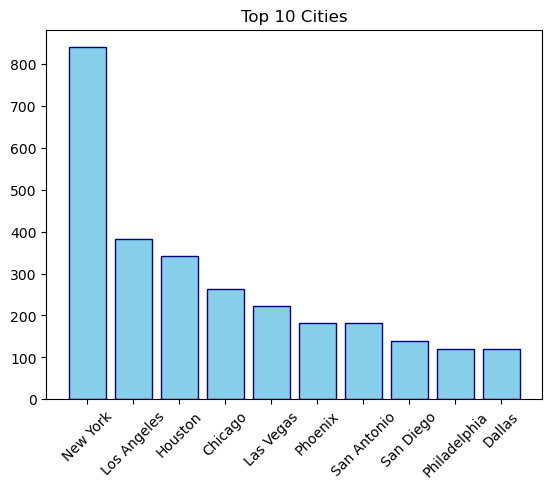

In [10]:
# Plot
import matplotlib.pyplot as plt

plt.bar(df['city'], df['user_count'], color='skyblue', edgecolor='navy')
plt.xticks(range(len(df)), labels=df['city'], rotation=45)
plt.title('Top 10 Cities')
plt.xticks(rotation=45)
plt.show()

## 2. Monthly Items Sold in 2019

- **Use case:** Understand seasonality and sales trends over time.
- **Insight:** Highlights peak and slow sales periods.
- **Visualization:** Line chart (month vs. items sold)

In [11]:
%%sql
SELECT
  date_format(try_cast(oi.delivered_at AS TIMESTAMP), '%Y-%m') AS year_month,
  COUNT(*) AS items_sold
FROM order_items oi
WHERE try_cast(oi.delivered_at AS TIMESTAMP) IS NOT NULL
  AND EXTRACT(YEAR FROM try_cast(oi.delivered_at AS TIMESTAMP)) = 2019
GROUP BY 1
ORDER BY 1;

 * awsathena+rest://@athena.us-west-2.amazonaws.com/ecommerce-db?s3_staging_dir=s3%3A%2F%2Fecommerce-data-20260120-results%2F
Done.


year_month,items_sold
2019-01,8
2019-02,13
2019-03,38
2019-04,31
2019-05,103
2019-06,107
2019-07,118
2019-08,115
2019-09,163
2019-10,161


In [12]:
query = """
SELECT
  date_format(try_cast(oi.delivered_at AS TIMESTAMP), '%Y-%m') AS year_month,
  COUNT(*) AS items_sold
FROM order_items oi
WHERE try_cast(oi.delivered_at AS TIMESTAMP) IS NOT NULL
  AND EXTRACT(YEAR FROM try_cast(oi.delivered_at AS TIMESTAMP)) = 2019
GROUP BY 1
ORDER BY 1;
"""

# Execute using the %sql magic with the variable
# Note: In most SageMaker setups, you can pass the python variable using {}
%sql monthly_results << {query}

# Convert to DataFrame
df = monthly_results.DataFrame()

#4 preview the data
df

 * awsathena+rest://@athena.us-west-2.amazonaws.com/ecommerce-db?s3_staging_dir=s3%3A%2F%2Fecommerce-data-20260120-results%2F
Done.
Returning data to local variable monthly_results


,year_month,items_sold
0,2019-01,8
1,2019-02,13
2,2019-03,38
3,2019-04,31
4,2019-05,103
5,2019-06,107
6,2019-07,118
7,2019-08,115
8,2019-09,163
9,2019-10,161


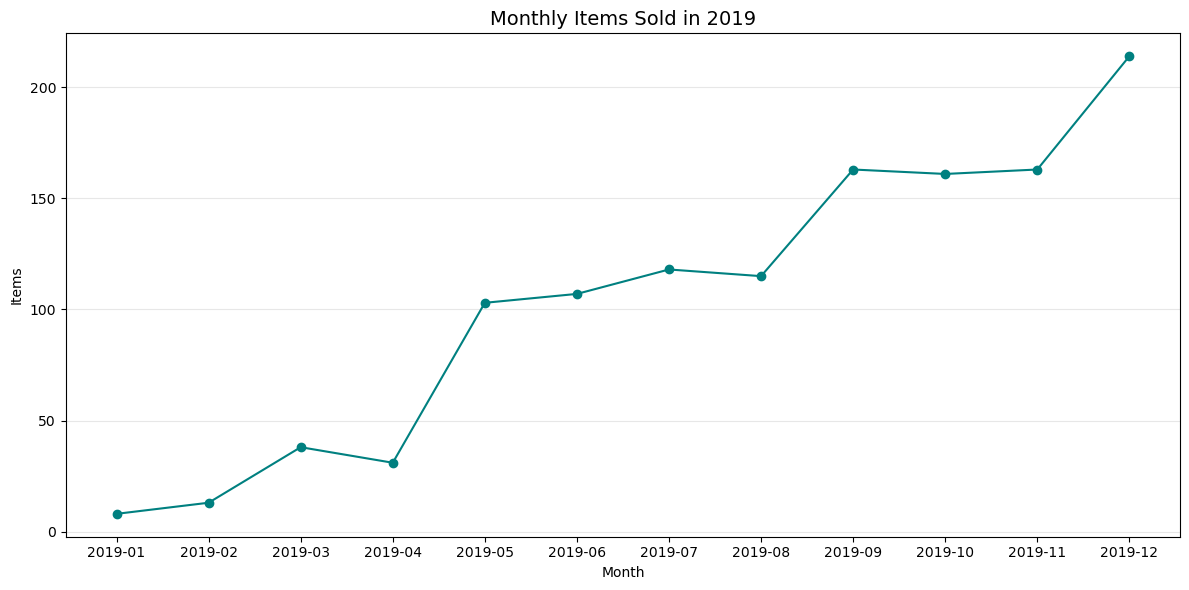

In [13]:
# 1. Create the plot
plt.figure(figsize=(12, 6))
plt.plot(df['year_month'], df['items_sold'], marker='o', linestyle='-', color='teal')

plt.title('Monthly Items Sold in 2019', fontsize=14)
plt.ylabel('Items')
plt.xlabel('Month')
plt.grid(True, axis='y', alpha=0.3)

plt.tight_layout() # Ensures labels don't get cut off
plt.show()

## 3. Revenue by Product Category and Department (Pivot-style)

- **Use case:** Compare how different categories perform within departments.
- **Insight:** Identifies strong and weak category–department combinations.
- **Visualization:** Horizontal bar chart or stacked bar chart

In [14]:
%%sql
SELECT
  p.department,
  p.category,
  SUM(p.retail_price) AS total_revenue
FROM order_items oi
JOIN products p ON oi.product_id = p.id
WHERE oi.status = 'Complete'
GROUP BY p.department, p.category
ORDER BY total_revenue DESC
limit 10;

 * awsathena+rest://@athena.us-west-2.amazonaws.com/ecommerce-db?s3_staging_dir=s3%3A%2F%2Fecommerce-data-20260120-results%2F
Done.


department,category,total_revenue
Men,Outerwear & Coats,211107.5497493744
Men,Jeans,199395.03014945984
Men,Suits & Sport Coats,163445.07982730865
Men,Sweaters,134520.09012508392
Women,Outerwear & Coats,118456.56003761292
Women,Intimates,116069.34008097649
Women,Jeans,115038.28039360046
Men,Pants,111361.50034046173
Women,Dresses,110494.99026870728
Men,Fashion Hoodies & Sweatshirts,97458.08996963501


## 4. Top 10 Products by Revenue

- **Use case:** Identify flagship products driving the most revenue.
- **Insight:** Helps prioritize inventory, promotions, and merchandising.
- **Visualization:** Bar chart (product vs. revenue)

In [15]:
%%sql
SELECT
  p.name AS product_name,
  p.brand,
  SUM(p.retail_price) AS revenue
FROM order_items oi
JOIN products p ON oi.product_id = p.id
WHERE oi.status = 'Complete'
GROUP BY name, brand
ORDER BY revenue DESC
LIMIT 10;

 * awsathena+rest://@athena.us-west-2.amazonaws.com/ecommerce-db?s3_staging_dir=s3%3A%2F%2Fecommerce-data-20260120-results%2F
Done.


product_name,brand,revenue
The North Face Apex Bionic Soft Shell Jacket - Men's,The North Face,7224.0
NIKE WOMEN'S PRO COMPRESSION SPORTS BRA *Outstanding Support and Comfort*,Nike,5418.0
Canada Goose Men's The Chateau Jacket,Canada Goose,4890.0
The North Face Apex Bionic Mens Soft Shell Ski Jacket 2013,The North Face,3612.0
The North Face Denali Down Womens Jacket 2013,The North Face,3612.0
Canada Goose Women's Solaris,Canada Goose,3475.0
7 For All Mankind Men's Ombre Plaid Blazer,7 For All Mankind,2786.0
JORDAN DURASHEEN SHORT MENS 404309-109,Jordan,2709.0
The North Face Nuptse 2 Jacket Deep Water Blue Mens,The North Face,2709.0
Diesel Men's Shioner Skinny Straight Leg Jean,Diesel,2551.749984741211


---

## Part 2. Data Analytics

- Advanced SQL + Reasoning
- SQL still computes the result, but **human interpretation** explains the “why”.

## 5. Average Order Value (AOV) by User Gender

- **Use case:** Compare purchasing behavior across demographic segments.
- **Insight:** Reveals differences in spending behavior across segments.
- **Visualization:** Pie chart (gender vs. AOV)

In [16]:
%%sql
SELECT
  u.gender,
  AVG(order_revenue) AS avg_order_value
FROM (
  SELECT
    o.order_id,
    o.user_id,
    SUM(p.retail_price) AS order_revenue
  FROM orders o
  JOIN order_items oi ON o.order_id = oi.order_id
  JOIN products p ON oi.product_id = p.id
  WHERE oi.status = 'Complete'
  GROUP BY o.order_id, o.user_id
) orders_with_revenue
JOIN users u ON orders_with_revenue.user_id = u.id
GROUP BY u.gender;

 * awsathena+rest://@athena.us-west-2.amazonaws.com/ecommerce-db?s3_staging_dir=s3%3A%2F%2Fecommerce-data-20260120-results%2F
Done.


gender,avg_order_value
F,81.10655577492675
M,92.08297212208696


In [17]:
query = """
SELECT
  u.gender,
  AVG(order_revenue) AS avg_order_value
FROM (
  SELECT
    o.order_id,
    o.user_id,
    SUM(p.retail_price) AS order_revenue
  FROM orders o
  JOIN order_items oi ON o.order_id = oi.order_id
  JOIN products p ON oi.product_id = p.id
  WHERE oi.status = 'Complete'
  GROUP BY o.order_id, o.user_id
) orders_with_revenue
JOIN users u ON orders_with_revenue.user_id = u.id
GROUP BY u.gender;
"""

# Execute using the %sql magic with the variable
# Note: In most SageMaker setups, you can pass the python variable using {}
%sql gender_results << {query}

# Convert to DataFrame
df = gender_results.DataFrame()

#4 preview the data
df

 * awsathena+rest://@athena.us-west-2.amazonaws.com/ecommerce-db?s3_staging_dir=s3%3A%2F%2Fecommerce-data-20260120-results%2F
Done.
Returning data to local variable gender_results


,gender,avg_order_value
0,M,92.082972
1,F,81.106556


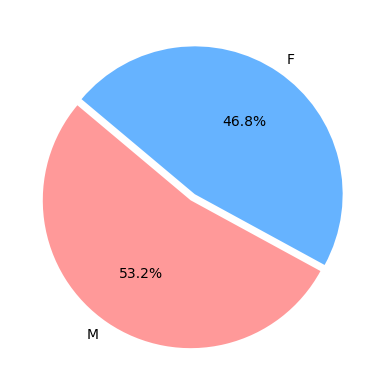

In [18]:
plt.pie(
    df['avg_order_value'], 
    labels=df['gender'], 
    autopct='%1.1f%%',      # This shows the percentage on the slices
    startangle=140,         # Rotates the start of the chart for better alignment
    colors=['#ff9999','#66b3ff'], # Soft red for F, soft blue for M
    explode=(0.05, 0)       # Slightly "explodes" the first slice for emphasis
)
plt.show();

## 6. Return Rate by Product Category

- **Use case:** Detect categories with quality or expectation issues.
- **Insight:** High return rates may indicate sizing, quality, or description problems.
- **Visualization:** Bar chart (category vs. return rate)

In [19]:
%%sql
SELECT
  p.category,
  CAST(COUNT(*) FILTER (WHERE oi.returned_at != '') AS DOUBLE) / COUNT(*) AS return_rate
FROM order_items oi
JOIN products p ON oi.product_id = p.id
GROUP BY p.category
ORDER BY return_rate DESC;

 * awsathena+rest://@athena.us-west-2.amazonaws.com/ecommerce-db?s3_staging_dir=s3%3A%2F%2Fecommerce-data-20260120-results%2F
Done.


category,return_rate
Jumpsuits & Rompers,0.11349036402569593
Suits,0.107421875
Suits & Sport Coats,0.10626076967260195
Pants,0.10534934497816593
Active,0.10422628219238389
Plus,0.10363173721952348
Shorts,0.10318898351150571
Maternity,0.10261374636979671
Outerwear & Coats,0.10247546833184656
Fashion Hoodies & Sweatshirts,0.10239798064787548


## 7. Customer Lifetime Value (CLV) – Top 20 Users

- **Use case:** Identify high-value customers for loyalty or retention programs.
- **Insight:** Helps target VIP customers.
- **Visualization:** Bar chart or ranked table

In [20]:
%%sql
SELECT
  u.id,
  u.city,
  SUM(p.retail_price) AS lifetime_value
FROM users u
JOIN orders o ON u.id = o.user_id
JOIN order_items oi ON o.order_id = oi.order_id
JOIN products p ON oi.product_id = p.id
WHERE oi.status = 'Complete'
GROUP BY u.id, u.city
ORDER BY lifetime_value DESC
LIMIT 20;

 * awsathena+rest://@athena.us-west-2.amazonaws.com/ecommerce-db?s3_staging_dir=s3%3A%2F%2Fecommerce-data-20260120-results%2F
Done.


id,city,lifetime_value
21671,Chengdu,1312.5700035095215
53432,Nanjing,1283.489990234375
70371,Santa Cruz de Tenerife,1275.3299865722656
87934,Webster,1273.25
22656,Jingdezhen,1264.9900016784668
80671,Madison,1179.3200073242188
9461,Chiba,1176.9899997711182
34280,Chengdu,1174.4900016784668
9607,Brasília,1160.9899997711182
74506,Beijing,1141.5


## 8. Inventory Profitability by Product

- **Use case:** Compare margin performance across products.
- **Insight:** Highlights the most profitable items, not just top sellers.
- **Visualization:** Bar chart (product vs. total profit)

In [21]:
%%sql
SELECT
  ii.product_name,
  ii.product_brand,
  SUM(ii.product_retail_price - ii.cost) AS total_profit
FROM inventory_items ii
WHERE ii.sold_at IS NOT NULL
GROUP BY ii.product_name, ii.product_brand
ORDER BY total_profit DESC
LIMIT 20;

 * awsathena+rest://@athena.us-west-2.amazonaws.com/ecommerce-db?s3_staging_dir=s3%3A%2F%2Fecommerce-data-20260120-results%2F
Done.


product_name,product_brand,total_profit
The North Face Apex Bionic Soft Shell Jacket - Men's,The North Face,30500.630903078243
NIKE WOMEN'S PRO COMPRESSION SPORTS BRA *Outstanding Support and Comfort*,Nike,22908.20700079389
Canada Goose Women's Solaris,Canada Goose,22559.699948839843
Canada Goose Men's The Chateau Jacket,Canada Goose,20787.389939320274
The North Face Apex Bionic Mens Soft Shell Ski Jacket 2013,The North Face,18357.989941198375
Canada Goose Women's Mystique,Canada Goose,17543.249983806163
The North Face Denali Down Womens Jacket 2013,The North Face,16889.711966279894
Nobis Merideth Parka,Nobis,16504.20003980398
The North Face Nuptse 2 Jacket Deep Water Blue Mens,The North Face,14457.932962942868
Nobis Yatesy Parka,Nobis,13066.299943998456


## 9. Repeat vs. One-Time Buyers

- **Use case:** Measure customer retention health.
- **Insight:** Indicates whether growth is driven by acquisition or retention.
- **Visualization:** Pie chart or bar chart

In [22]:
%%sql
SELECT
  CASE
    WHEN order_count = 1 THEN 'One-time buyers'
    ELSE 'Repeat buyers'
  END AS customer_type,
  COUNT(*) AS users
FROM (
  SELECT
    user_id,
    COUNT(DISTINCT order_id) AS order_count
  FROM orders
  GROUP BY user_id
)
GROUP BY 
  CASE
    WHEN order_count = 1 THEN 'One-time buyers'
    ELSE 'Repeat buyers'
  END;

 * awsathena+rest://@athena.us-west-2.amazonaws.com/ecommerce-db?s3_staging_dir=s3%3A%2F%2Fecommerce-data-20260120-results%2F
Done.


customer_type,users
Repeat buyers,30212
One-time buyers,49832


---
## Part 3. Use Cases Requiring Machine Learning

#### Examples:
- Demand forecasting
- Returned order predictions
- Recommendations

#### SQL is still needed:
- to transform tables into ML features
- SQL alone doesn't produce predictions

#### Example 1: Predict High-Value Customers

Using SQL, we can prepare features such as:
- Total spend
- Order frequency
- Average order value
- Time since last purchase

ML is required to:
- Learn patterns from past customers
- Generalize to new customers
- Output probabilities instead of aggregates

In [24]:
%%sql
SELECT
  u.id AS user_id,
  COUNT(DISTINCT o.order_id) AS order_count,
  SUM(p.retail_price) AS total_spend,
  AVG(p.retail_price) AS avg_item_price,
  MAX(o.created_at) AS last_order_date
FROM users u
JOIN orders o ON u.id = o.user_id
JOIN order_items oi ON o.order_id = oi.order_id
JOIN products p ON oi.product_id = p.id
WHERE oi.status = 'Complete'
GROUP BY u.id
LIMIT 20;

 * awsathena+rest://@athena.us-west-2.amazonaws.com/ecommerce-db?s3_staging_dir=s3%3A%2F%2Fecommerce-data-20260120-results%2F
Done.


user_id,order_count,total_spend,avg_item_price,last_order_date
72187,1,21.0,21.0,2023-10-05 14:53:00+00:00
43614,1,112.5,112.5,2023-03-05 14:52:00+00:00
50264,1,3.5,3.5,2023-10-22 05:04:00+00:00
16664,1,18.6200008392334,18.6200008392334,2024-01-12 07:34:00+00:00
55285,1,265.189998626709,132.5949993133545,2023-05-12 18:28:00+00:00
55802,2,80.25,40.125,2023-01-15 15:33:00+00:00
14711,1,12.800000190734863,12.800000190734863,2023-06-06 04:41:00+00:00
53735,1,154.57000732421875,154.57000732421875,2022-06-02 00:30:00+00:00
41646,1,29.989999771118164,29.989999771118164,2022-11-03 00:27:00+00:00
5399,1,54.0,54.0,2023-09-05 18:53:00+00:00
